

---


# **Objective**


---



### **Detect anomalies in network traffic that may indicate potential security breaches by analyzing network traffic data to identify patterns and detect unusual activities that could signify cyber threats.**



---


# **Data Collection And Preprocessing**


---





 ### **Importing Libraries**



In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


### **Reading CSV File**

In [2]:
df = pd.read_csv('Test_data.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


### **Displaying the Head**

In [3]:
df.head(0)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate


### **Dropping Null Values**

In [4]:
df.dropna(inplace = True)


### **Dropping the duplicates**

In [5]:
df.drop_duplicates()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


### **Encoding Categorical Features**

In [13]:
categorical_features = ['protocol_type','service','flag']
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)

### **Normalizing the data**

In [14]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

### **Converting Back to Dataframe**

In [15]:
normalized_data = pd.DataFrame(normalized_data, columns = df.columns)



---


# **Feature Extraction**


---



### **The dataset already includes features relevant to network traffic.**



---


# **Anomaly Detection Algorithms**


---



## **Isolation Forest**

In [19]:
#Initializing the model
iso_forest = IsolationForest(contamination = 0.1, random_state=42)

#Fitting the model
iso_forest.fit(normalized_data)

#Predicting Anomalies (1 for normal, -1 for anomaly)
anomaly_prediction = iso_forest.predict(normalized_data)

#Adding the predicions to the dataset
normalized_data['anomaly_prediction'] = anomaly_prediction

#Displaying the distribution of anomaly predictions
anomaly_counts = normalized_data['anomaly_prediction'].value_counts()
print("Anomaly Counts: \n", anomaly_counts)

Anomaly Counts: 
 anomaly_prediction
 1    20289
-1     2255
Name: count, dtype: int64


## **Autoencoders**

In [32]:
#Defining the model
input_dim = normalized_data.shape[1] - 1
input_layer = Input(shape = (input_dim))
encoder = Dense(64, activation= "relu")(input_layer)
encoder = Dense(32, activation= "relu")(encoder)
encoder = Dense(16, activation= "relu")(encoder)
decoder = Dense(32, activation= "relu")(encoder)
decoder = Dense(64, activation= "relu")(decoder)
decoder = Dense(input_dim, activation = "sigmoid")(decoder)
autoencoder = Model(inputs = input_layer, outputs=decoder)

#Compling the model
autoencoder.compile(optimizer = 'adam', loss = 'mse')

#Training the model
X_train = normalized_data.drop(columns = ['anomaly_prediction']).values
autoencoder.fit(X_train, X_train, epochs = 20, batch_size = 32, shuffle= True, validation_split= 0.1)

#Reconstruction loss
reconstructions = autoencoder.predict(X_train)
reconstruction_loss = np.mean(np.square(reconstructions - X_train), axis = 1)

#Setting the threshold
threshold = np.percentile(reconstruction_loss, 90)
anomaly_predictions = (reconstruction_loss > threshold).astype(int)

#Adding predictions to the dataset
normalized_data['anomaly_autoencoder'] = anomaly_predictions

#Displaying The distribution
anomaly_counts_autoencoder = normalized_data['anomaly_autoencoder'].value_counts()
print("Anomaly Counts (Autoencoder): \n", anomaly_counts_autoencoder)

Epoch 1/20
635/635 [==============================] - 2s 2ms/step - loss: 0.0274 - val_loss: 0.0078
Epoch 2/20
635/635 [==============================] - 2s 3ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 3/20
635/635 [==============================] - 1s 1ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 4/20
635/635 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 5/20
635/635 [==============================] - 1s 1ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 6/20
635/635 [==============================] - 1s 1ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 7/20
635/635 [==============================] - 1s 1ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 8/20
635/635 [==============================] - 1s 1ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 9/20
635/635 [==============================] - 1s 2ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 10/20
635/635 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0033



---


# **Evaluation and Validation**


---



### **Comparing the results**

In [36]:
print("Isolation Forest Anomaly Counts: \n", anomaly_counts)
print("Autoencoder Anomaly Counts: \n", anomaly_counts_autoencoder)

Isolation Forest Anomaly Counts: 
 anomaly_prediction
 1    20289
-1     2255
Name: count, dtype: int64
Autoencoder Anomaly Counts: 
 anomaly_autoencoder
0    20289
1     2255
Name: count, dtype: int64


### **Plotting the anomalies**

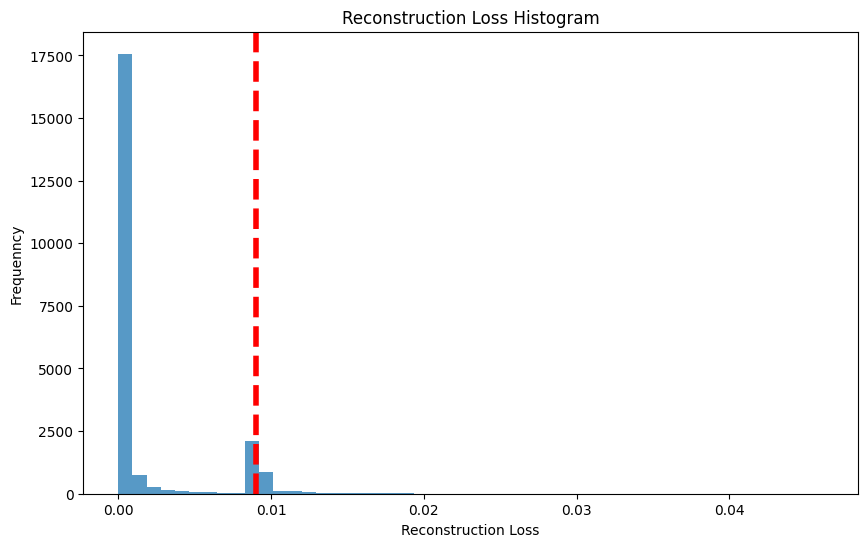

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(reconstruction_loss, bins = 50, alpha=0.75)
plt.axvline(threshold, color='r', linestyle= '--', linewidth= 4)
plt.title('Reconstruction Loss Histogram')
plt.xlabel('Reconstruction Loss')
plt.ylabel('Frequenncy')
plt.show()